# Imports

In [70]:
%load_ext autoreload
%load_ext lab_black
%autoreload 2

import os
import sys

sys.path.append(os.getenv("GLOBAL_LIBRARIES_PATH", ""))
sys.path = list(set(sys.path))

import numpy as np

from pathlib import Path
from PIL import Image, ImageDraw
from IPython.display import display
from copy import deepcopy

# from helpers.shapes import Point, Shape, Segment
from shapely import Point, Polygon, affinity, LineString
from shapely.ops import unary_union
from helpers.polygon_wrapper import WrpShape

pmt_storage = Path(os.getenv("PMT_STG_PATH"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Continue

### check framework

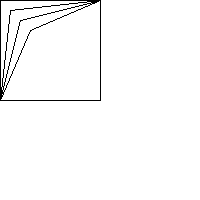

In [2]:
white_col = (255, 255, 255)
im = Image.new("RGB", (200, 200), white_col)

shape_list = []

shape_list.append(
    Shape(points=[Point(0, 0), Point(0, 100), Point(100, 100), Point(100, 0)])
)
shape_list.append(
    Shape(points=[Point(10, 10), Point(0, 100), Point(100, 100), Point(100, 0)])
)
shape_list.append(
    Shape(points=[Point(20, 20), Point(0, 100), Point(100, 100), Point(100, 0)])
)
shape_list.append(
    Shape(points=[Point(30, 30), Point(0, 100), Point(100, 100), Point(100, 0)])
)

for sss in shape_list:
    sss.draw(im)

im

### check combination

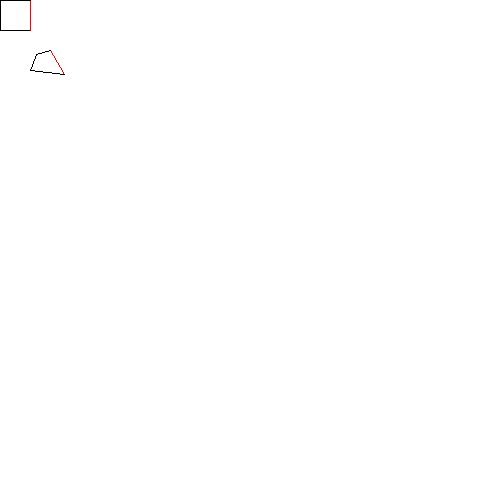

AttributeError: 'tuple' object has no attribute 'draw'

In [3]:
im = Shape.create_empty_img()

s1 = Shape(
    [Point(0, 0), Point(0, 30), Point(30, 30), Point(30, 0)], color_dict={2: "red"}
)
s1.draw(im)

s2 = Shape(
    [Point(50, 50), Point(64, 74), Point(30, 70), Point(36, 54)],
    color_dict={0: "red"},
)
s2.draw(im)

display(im)

im = Shape.create_empty_img()
cmb_shape = s1.combine(s2, (2, 0), (0, 0))
cmb_shape.draw(im)
display(im)

# everything with Shapely

In [7]:
p1 = Point(0, 0)
p2 = Point(1, 0)

list((p2).coords)

[(1.0, 0.0)]

[(0.0, 0.0), (0.0, -30.0), (30.0, -30.0), (30.0, -60.0), (60.0, -60.0), (60.0, -30.0), (90.0, -30.0), (90.0, 0.0), (0.0, 0.0)]


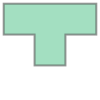

In [43]:
t_pol = WrpShape(
    ((0, 0), (0, -30), (30, -30), (30, -60), (60, -60), (60, -30), (90, -30), (90, 0))
)
t_pol = t_pol.polygon
# t_pol = affinity.translate(t_pol, xoff=30, yoff=30)
# t_pol = affinity.rotate(t_pol, angle=10, origin=(0, 0))
# t_pol = t_pol.reverse()
print(list(t_pol.exterior.coords))
t_pol

In [41]:
sh_l = []
sh_l.append(
    WrpShape(
        (
            (0, 0),
            (0, -30),
            (30, -30),
        )
    )
)
sh_l.append(
    WrpShape(
        (
            (30, -30),
            (30, -60),
            (60, -60),
            (34, 0),
            (0, 0),
        )
    )
)
sh_l.append(
    WrpShape(
        (
            (60, -60),
            (60, -30),
            (90, -30),
            (90, 0),
            (34, 0),
        )
    )
)

In [77]:
angle

45.0

In [91]:
s1, s2 = sh_l[:2]
cmb_l = s1.get_all_combinations(s2)

Intersection (0.0, 0.0) (30.0, -60.0)
Intersection (0.0, 0.0) (0.0, 0.0)
Intersection (0.0, -30.0) (30.0, -30.0)
Intersection (0.0, -30.0) (0.0, 0.0)
Intersection (0.0, -30.0) (30.0, -30.0)
Intersection (30.0, -30.0) (30.0, -30.0)
Intersection (30.0, -30.0) (30.0, -60.0)
Intersection (30.0, -30.0) (60.0, -60.0)
Intersection (30.0, -30.0) (30.0, -30.0)
Intersection (0.0, 0.0) (30.0, -60.0)
Intersection (0.0, 0.0) (0.0, 0.0)


In [97]:
import ipywidgets as widgets

into = widgets.IntText()
output = widgets.Output()


def on_chg(_):
    output.clear_output(wait=True)
    with output:
        display(cmb_l[into.value])


on_chg({"": None})
into.observe(on_chg, names="value")
widgets.VBox([into, output])

# Implement T test

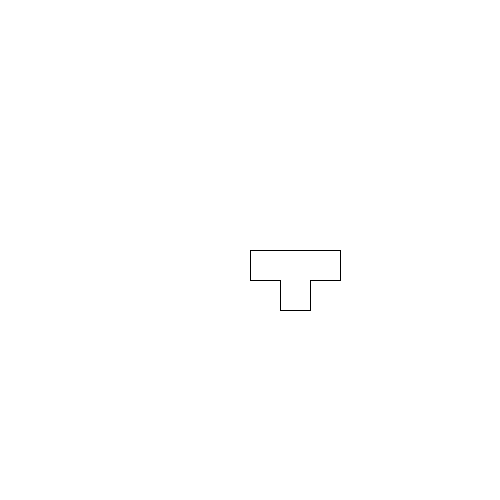

In [37]:
im = Shape.create_empty_img()

s1 = Shape(
    [
        Point(0, 0),
        Point(0, 30),
        Point(30, 30),
        Point(30, 60),
        Point(60, 60),
        Point(60, 30),
        Point(90, 30),
        Point(90, 0),
    ],
)
s1.translate(Point(250, 250) - Point(0, 0))
s1.draw(im)
im

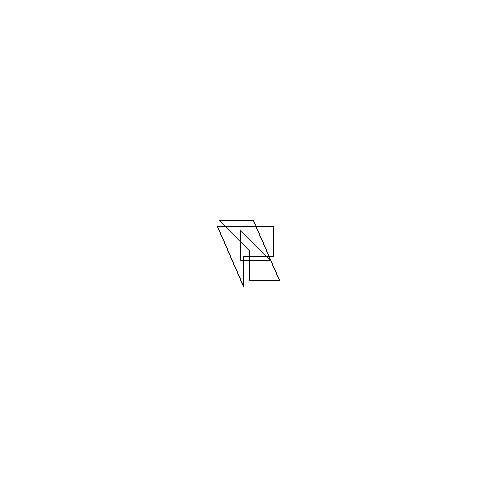

In [56]:
im = Shape.create_empty_img()

sh_l = []
main_s1 = Shape(
    [
        Point(0, 0),
        Point(0, 30),
        Point(30, 30),
        Point(30, 60),
        Point(60, 60),
        Point(60, 30),
        Point(90, 30),
        Point(90, 0),
    ],
)
# sh_l.append(main_s1)

s1 = Shape(deepcopy(main_s1.points[:3]))
sh_l.append(s1)

s1 = Shape(
    [
        Point(30, 30),
        Point(30, 60),
        Point(60, 60),
        Point(34, 0),
        Point(0, 0),
    ],
)
sh_l.append(s1)

s1 = Shape(
    [
        Point(60, 60),
        Point(60, 30),
        Point(90, 30),
        Point(90, 0),
        Point(34, 0),
    ],
)
sh_l.append(s1)


for sss in sh_l:
    #    sss.translate(Point(250, 250) - Point(0, 0))
    sss.center(Point(250, 250))
    sss.draw(im)
im

(240.0,230.0)->(240.0,260.0) (249.2,250.0)->(249.2,280.0) (240.0,230.0)
(240.0,230.0)->(240.0,260.0) (240.0,230.0)->(240.0,260.0) (240.0,230.0)
0.0
(240.0,230.0)->(240.0,260.0) (240.0,230.0)->(240.0,200.0) (240.0,230.0)


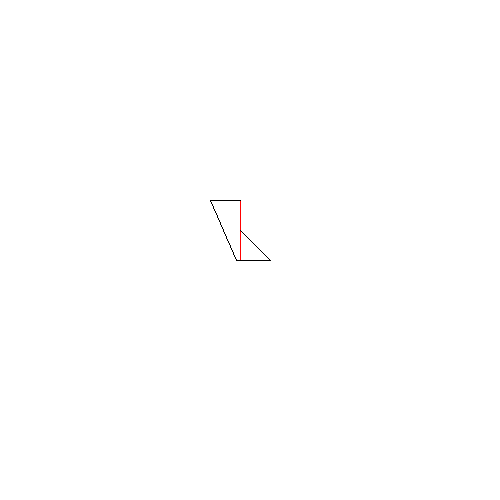

In [79]:
sss1, sss2 = sh_l[:2]
s1, s2 = deepcopy(sss1), deepcopy(sss2)
s1.color_dict = {0: "red"}
s2.color_dict = {0: "red"}
s1, s2 = s1.combine(s2, (0, 0), (0, 0))
Shape.show_all([s1, s2])

In [80]:
s1.polygon.overlaps(s2.polygon)

False

In [81]:
s1.points

[(240.0,230.0), (240.0,260.0), (270.0,260.0)]

In [82]:
s2.points

[(240.0,230.0), (240.0,200.0), (210.0,200.0), (236.0,260.0), (270.0,260.0)]

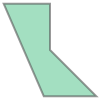

In [85]:
s2.polygon

In [54]:
p1 = s1.polygon
p2 = s2.polygon

p1.overlaps(p2)

False

In [ ]:
s1 = deepcopy(sss1)
s2 = deepcopy(sss2)

g1 = s1.segments[0]
g2 = s2.segments[0]

pp = (g1.points[0], g2.points[0])

center_point = pp[0]

s2.translate(pp[0] - pp[1])
angl = degrees(g2.coeff) - degrees(g1.coeff)
# s2.rotate(center_point, 180 - angl)

im = Shape.create_empty_img()

s1.draw(im)
s2.draw(im)
im

In [ ]:
cmb_l = sss1.get_all_combinations(sss2)

In [ ]:
len(cmb_l)